In [1]:
import sys
sys.path.insert(0, 'C:\\Users\\zhouz\\Documents\\GitHub\\scikit-learn')

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from UFI_cls import UFI_cls
from UFI_regr import UFI_regr

### Define functions for generating data: 

In [3]:
def gen_noise_cls(n):

    x1 = np.random.normal(size=n).reshape((n, 1))
    x2 = np.random.choice(2, n).reshape((n, 1))
    x3 = np.random.choice(4, n).reshape((n, 1))
    x4 = np.random.choice(10, n).reshape((n, 1))
    x5 = np.random.choice(20, n).reshape((n, 1))
    
    y = np.random.choice(2, n)
    
    X = np.concatenate((x1, x2, x3, x4, x5), axis = 1)
    
    return [X, y]

In [4]:
def gen_noise_regr(n):

    x1 = np.random.normal(size=n).reshape((n, 1))
    x2 = np.random.choice(2, n).reshape((n, 1))
    x3 = np.random.choice(4, n).reshape((n, 1))
    x4 = np.random.choice(10, n).reshape((n, 1))
    x5 = np.random.choice(20, n).reshape((n, 1))
    
    y = np.random.normal(size=n).reshape((n, 1))

    y = y.ravel()

    X = np.concatenate((x1, x2, x3, x4, x5), axis = 1)
    
    return [X, y]

### To get unbiased measurement of feature importance, simply call UFI_cls(model, X, y) or UFI_regr(model, X, y) for classification and regression respectively, where model is the trained random forests object, and X(covariate) and y(response) are training data. 

### For illustration, we reproduce Figure 9 from the paper.

### Classification: 

In [5]:
n = 1000
n_estimators = 100

m = 100

score = pd.DataFrame(columns=['x1','x2','x3','x4','x5'])

for i in range(m):
    
    X, y = gen_noise_cls(n)

#     if i % 5 == 0:
#         print(i)
        
    cls = RandomForestClassifier(n_estimators = n_estimators, max_depth = 5)
    cls.fit(X, y)
    
    score.loc[i] = UFI_cls(cls, X, y)

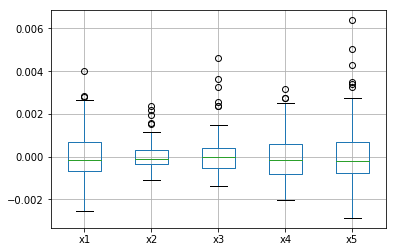

In [7]:
score.boxplot()

### Regression:

In [8]:
n = 1000
n_estimators = 100

m = 100

score = pd.DataFrame(columns=['x1','x2','x3','x4','x5'])

for i in range(m):
    
    X, y = gen_noise_regr(n)

#     if i % 5 == 0:
#         print(i)
        
    regr = RandomForestRegressor(n_estimators = n_estimators, max_depth=5)
    regr.fit(X, y)
    
    score.loc[i] = UFI_regr(regr, X, y)

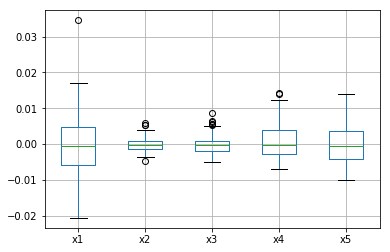

In [9]:
score.boxplot()